# 중심극한정리, CLT

만일 모집단에서 표본크기(n)가 충분히 크면 모집단이 어떠한 분포라도 표본평균의 분포는 근사적으로 정규분포임을 보일 수 있다.   
즉 모집단의 분포와 상관없이 큰 표본들의 “표본평균의 분포"가  정규분포로 수렴한다는 점을 이용하면 확률을 손쉽게 구할 수 있다. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### 이항분포의 정규 근사
다음과 같은 이항분포 B(n, 0.5) 에서 표본의 크기 n이 커짐에 따라 근사적으로 평균이 np, 분산이 np(1-p)인 정규분포 N(np, np(1-p))를 따른다.

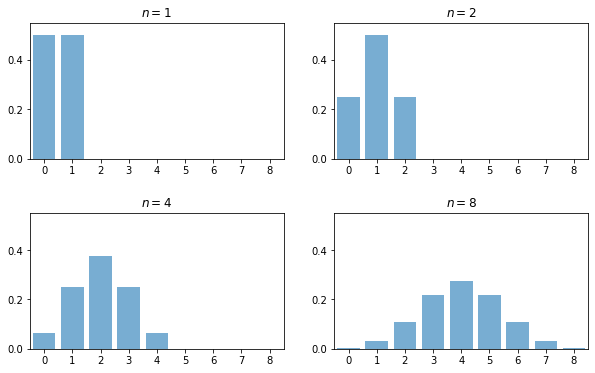

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
plt.subplots_adjust(hspace=0.4)
axes = axes.flatten()
ns = [1, 2, 4, 8]
dom = list(range(9))

for ax, n in zip(axes, ns):
    b = stats.binom(n, 0.5)
    ax.bar(dom, b.pmf(dom), alpha=0.6, align='center')
    ax.set(xlim=(-0.5, 8.5), ylim=(0, 0.55),
           xticks=list(range(9)), yticks=(0, 0.2, 0.4),
           title=f'$n = {n}$')

plt.show()

#### 포아송분포의 표본평균의 분포
n = 10000 이고 $X_1, X_2...X_{10000} \thicksim Poi(3) $이라고 할 때 표본평균의 분포를 생각해보자. 

In [4]:
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 1000
Xs_sample = rv.rvs((n, sample_size)) #10000개를 1000번
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

중심극한정리에 의해 $\bar{X}$는 근사적으로 $N\left(3, \dfrac{3}{10000}\right)$을 따른다. 

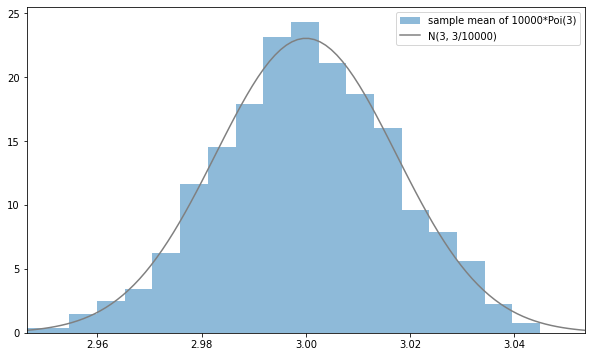

In [9]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=20, density=True,
        alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')
ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

# 큰 수의 법칙

큰 수의 법칙은 표본의 크기를 키우면 표본 평균은 모평균에 수렴한다는 법칙이다. 대수의 법칙이라고도 한다. 예를들어 주사위를 몇 만번 굴리면 6이 나오는 확률이 1/6에  가까워진다는 것을 직감적으로 이해할 수 있다. 이것을 수학적으로 증명하는 것이 큰 수의 법칙이다.  

---
큰 수의 법식을 주사위가 6이 나오는지 여부로 확인해 보자. 하나하나의 시행은 Bern(1/6)을 따르므로 표본 크기가 커짐에 따라 표본평균이 1/6에 수렴하게 될 것이다. 

In [5]:
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n, 4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0)
                      for sp in space]).T

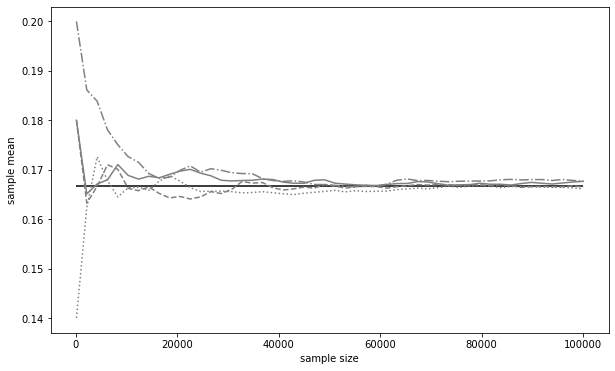

In [6]:
linestyles = ['-', '--', ':', '-.']

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()

표본크기가 작을때는 변동이 크지만 표본의 크기가 커지면서 그 결과는 1/6에 수렴함을 알 수 있다.